# What target should we use:
* Imagine that we can perfectly predict a certain target.
* Can we come out with a trading strategy based on this model?
* How often and accurate do we need to be able to do this?
* Lets not think on fees for now - ugly.

In [1]:
from sys import platform

In [2]:
platform

'darwin'

In [3]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [4]:
import pandas as pd
import random
import numpy as np

In [5]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday_modified/IBM_adjusted.txt', header=None, names=names)
df['DateTime']= pd.to_datetime((df.Date+' '+df.Time),infer_datetime_format=True) 
df = df.set_index('DateTime')

dg = pd.read_csv('data/sampleKibotData/minuteIntraday_modified/OIH_adjusted.txt', header=None, names=names)
dg['DateTime']= pd.to_datetime((dg.Date+' '+dg.Time),infer_datetime_format=True) 
dg = dg.set_index('DateTime')

s1 = (df.High+df.Low)/2
s2 = (dg.High+dg.Low)/2

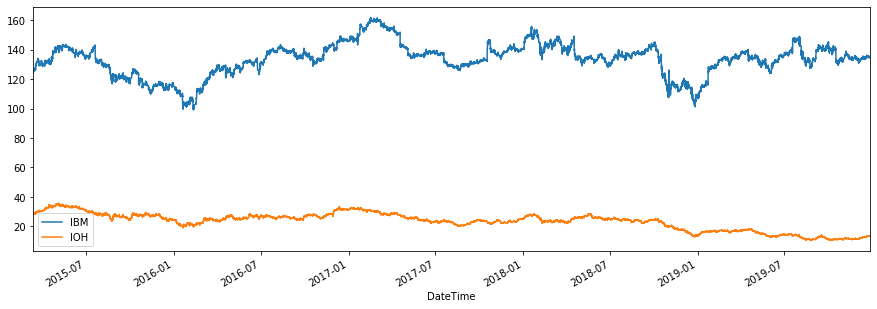

In [6]:
ds = pd.concat([s1, s2], axis=1)
ds = ds.dropna(how='any')
ds.columns = ['IBM', 'IOH']
ds.plot(figsize=(15,5))

In [7]:
ds

,IBM,IOH
DateTime,,
2015-03-13 10:26:00,125.94500,28.66500
2015-03-13 10:27:00,125.77000,28.66500
2015-03-13 10:28:00,125.68000,28.67000
2015-03-13 10:29:00,125.64500,28.67000
2015-03-13 10:30:00,125.67000,28.63500
2015-03-13 10:31:00,125.64000,28.63500
2015-03-13 10:32:00,125.68000,28.63000
2015-03-13 10:33:00,125.64500,28.63000
2015-03-13 10:34:00,125.59500,28.64000


In [8]:
ds = ds[-100000:].copy()
ds['increaseIBM'] = (1+ds.IBM.pct_change()).fillna(1)
ds['increaseIOH'] = (1+ds.IOH.pct_change()).fillna(1)
ds['increaseGOD'] = ds.apply(lambda x: max(x.increaseIBM, x.increaseIOH), axis=1)
ds['positionGOD'] = ds.apply(lambda x: 'IBM' if x.increaseIBM>x.increaseIOH else 'IOH', axis=1)
ds['increaseDUM'] = ds.apply(lambda x: min(x.increaseIBM, x.increaseIOH), axis=1)
ds['positionDUM'] = ds.apply(lambda x: 'IBM' if x.increaseIBM<x.increaseIOH else 'IOH', axis=1)
ds['positionMON'] = [random.choice(['IBM','IOH']) for _ in range(len(ds))]
ds['increaseMON'] = ds.apply(lambda x: x['increase'+x.positionMON], axis=1)
# sanity check:
#ds.increaseIBM.prod()

In [9]:
100*(5000/100000)

5.0

In [10]:
moves = [None for _ in range(len(ds))]
indexes = [i for i in range(len(ds))]
goodMoves = np.random.choice(indexes, size = 4000, replace=False, p=None)
badMoves = np.random.choice(indexes, size = 1000, replace=False, p=None)
for gi in goodMoves: moves[gi]='positionGOD'
for bi in badMoves: moves[bi]='positionDUM'

ds['positionSTR'] = moves
ds['positionSTR'] = ds.apply(lambda x: x[x.positionSTR] if x.positionSTR is not None else None, axis=1)
   
positions = ds.positionSTR.values
positions[0]='IBM'

for i in range(1, len(positions)):
    positions[i]=positions[i-1] if positions[i]==None else positions[i]

ds['positionSTR']=positions
ds['increaseSTR']= ds.apply(lambda x: x['increase'+x.positionSTR], axis=1)

In [11]:
print(ds.increaseIBM.product())
print(ds.increaseIOH.product())
print(ds.increaseGOD.product())
print(ds.increaseMON.product())
print(ds.increaseDUM.product())

1.214163899111304
0.9116271093428071
855058410527.6173
1.257491294964252
1.294490191532536e-12


In [12]:
ds[[col for col in ds.columns if 'increase' in col ]].drop(columns=['increaseGOD', 'increaseDUM']).cumprod().plot(figsize=(15, 6))

TypeError: drop() got an unexpected keyword argument 'columns'

In [ ]:
positions = ds.positionSTR.values
counter = 0
for i in range(1, len(positions)):
    counter+=0 if positions[i]==positions[i-1] else 1
print(counter)

In [ ]:
2500

In [ ]:
ds.shape

In [ ]:
import datetime as datetime

In [ ]:
pd.Series(ds.index).apply(lambda x: datetime.date(x.year, x.month, x.day)).value_counts().index

In [ ]:
#259 days 4800 transactions

In [ ]:
2500/259

In [ ]:
### this should be implemented as clear as possible!

transactionCost = 0.01
GOD = []
numStocksGOD = []
feesGOD=[]
IBM = list(ds.IBM)
IOH = list(ds.IOH)
positionGOD = list(ds.positionGOD)
increaseGOD = list(ds.increaseGOD)

GOD.append(100) #GOD starts with 100, as usual
numStocksGOD.append(GOD[-1]/(IBM[0] if positionGOD[0]=='IBM' else IOH[0]))
feesGOD.append(numStocksGOD[-1]* transactionCost)


for i in range(1, len(IBM)):
    feesGOD.append(numStocksGOD[-1]* transactionCost if positionGOD[i]!=positionGOD[i-1] else 0)
    GOD.append(GOD[-1]*increaseGOD[i]-feesGOD[-1])
    numStocksGOD.append(GOD[-1]/(IBM[0] if positionGOD[i]=='IBM' else IOH[i]))
    
    
ds['GOD'] = GOD
ds['numStocksGOD'] = numStocksGOD
ds['feesGOD']=feesGOD

In [ ]:
ds.head()

In [ ]:
print(len(GOD))
print(len(numStocksGOD))
print(len(feesGOD))

In [ ]:
ds

In [ ]:
ds[['increaseIBM', 'increaseIOH', 'increaseGOD']][:100].cumprod().plot()

In [ ]:
ds.increaseIBM.cumprod().plot()

In [ ]:
ds.IBM.plot()

In [ ]:
ds.IBM.values[0]